In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings, random

warnings.filterwarnings('ignore')

try:
  import shap
except:
  !pip install shap
  import shap

In [ ]:
df = pd.read_csv('smartphone.csv')
df

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน
...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ
65,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...
66,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด
67,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี


In [ ]:
df = df[df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'] != 'IOS และ Andriod'].copy()

In [ ]:
salary_map = {
    'น้อยกว่า 20,000 บาท': 0,
    '20,001-30,000 บาท': 1,
    '30,001-40,000 บาท': 2,
    '40,001-50,000 บาท': 3,
    '50,001-60,000 บาท': 4,
    'มากกว่า 60,000 บาท': 5
}

value_map = {
    'น้อยที่สุด': 0,
    'ค่อนข้างน้อย': 1,
    'ปานกลาง': 2,
    'บ่อยครั้ง': 3,
    'บ่อยที่สุด': 4
}

age_map = {
    '21-25 ปี': 0,
    '26-30 ปี': 1,
    '31-35 ปี': 2,
    '36-40 ปี': 3
}

os_map = {
    'IOS และ Andriod': 2,
    'IOS': 1,
    'Android': 0
}

In [ ]:
df['salary'] = df['ช่วงเงินเดือนของผู้ตอบแบบสอบถาม'].map(salary_map)
df['game'] = df['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]'].map(value_map)
df['social'] = df['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]'].map(value_map)
df['movie'] = df['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]'].map(value_map)
df['photo'] = df['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]'].map(value_map)

df.drop('ช่วงเงินเดือนของผู้ตอบแบบสอบถาม', axis = 1, inplace = True)
df.drop('ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]', axis = 1, inplace = True)
df.drop('ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]', axis = 1, inplace = True)
df.drop('ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]', axis = 1, inplace = True)
df.drop('ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]', axis = 1, inplace = True)
df

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด,salary,game,social,movie,photo
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,IOS,Iphone,ดูรวยดีย์,3,3,4,2,1
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,IOS,Iphone,ความเสถียร,2,1,4,2,2
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,IOS,Iphone,คุ้นเคยกับ Brand เดิม,3,0,2,2,0
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,IOS,Iphone,ง่ายต่อการใช้งาน,2,0,2,2,0
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,IOS,Iphone,ดี ทน,0,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,Android,Google,เป็นแบรนด์ที่น่าสนใจ,2,2,4,1,3
65,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,IOS,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,5,2,3,2,2
66,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,Android,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,0,0,4,3,2
67,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,IOS,Iphone,Ecosystem ดี,3,1,3,2,4


In [ ]:
df2 = pd.concat([df, pd.get_dummies(df['อาชีพของผู้ตอบแบบสอบถาม'])], axis = 1)
df2 = pd.concat([df2, pd.get_dummies(df['เพศของผู้ตอบแบบสอบถาม'])], axis = 1)
df2['os'] = df2['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'].map(os_map)

df2.drop(['Timestamp','เพศของผู้ตอบแบบสอบถาม', 'ช่วงอายุของผู้ตอบแบบสอบถาม','อาชีพของผู้ตอบแบบสอบถาม','ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด','หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด','จากข้อที่แล้ว เนื่องจากสาเหตุใด','หญิง'], axis = 1, inplace = True)

In [ ]:
df2

,salary,game,social,movie,photo,Freelancer,ข้าราชการ,นักศึกษา,รัฐวิสาหกิจ,ว่างงาน,เอกชน,ชาย,os
0,3,3,4,2,1,False,False,False,False,False,True,False,1
1,2,1,4,2,2,False,False,False,False,False,True,True,1
2,3,0,2,2,0,False,False,False,False,False,True,True,1
3,2,0,2,2,0,False,False,False,False,False,True,True,1
4,0,2,3,1,1,False,False,False,False,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2,2,4,1,3,False,False,False,False,False,True,False,0
65,5,2,3,2,2,False,False,False,False,False,True,True,1
66,0,0,4,3,2,False,False,True,False,False,False,False,0
67,3,1,3,2,4,False,False,False,False,False,True,True,1


In [ ]:
for col in df2.columns:
  df2[col] = df2[col].astype('int')

In [ ]:
rename_dict = {
    'ข้าราชการ': 'government officer',
    'นักศึกษา': 'student',
    'รัฐวิสาหกิจ': 'state_enterprises',
    'ว่างงาน': 'unemployed',
    'เอกชน': 'employed_person',
    'ชาย': 'male'
}
df2.rename(columns=rename_dict, inplace=True)

In [ ]:
df2

,salary,game,social,movie,photo,Freelancer,government officer,student,state_enterprises,unemployed,employed_person,male,os
0,3,3,4,2,1,0,0,0,0,0,1,0,1
1,2,1,4,2,2,0,0,0,0,0,1,1,1
2,3,0,2,2,0,0,0,0,0,0,1,1,1
3,2,0,2,2,0,0,0,0,0,0,1,1,1
4,0,2,3,1,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2,2,4,1,3,0,0,0,0,0,1,0,0
65,5,2,3,2,2,0,0,0,0,0,1,1,1
66,0,0,4,3,2,0,0,1,0,0,0,0,0
67,3,1,3,2,4,0,0,0,0,0,1,1,1


In [ ]:
X = df2.drop('os', axis = 1)
y = df2[['os']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=244, stratify=y)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.3f}')

Accuracy: 0.714


In [ ]:
explainer = shap.Explainer(model, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

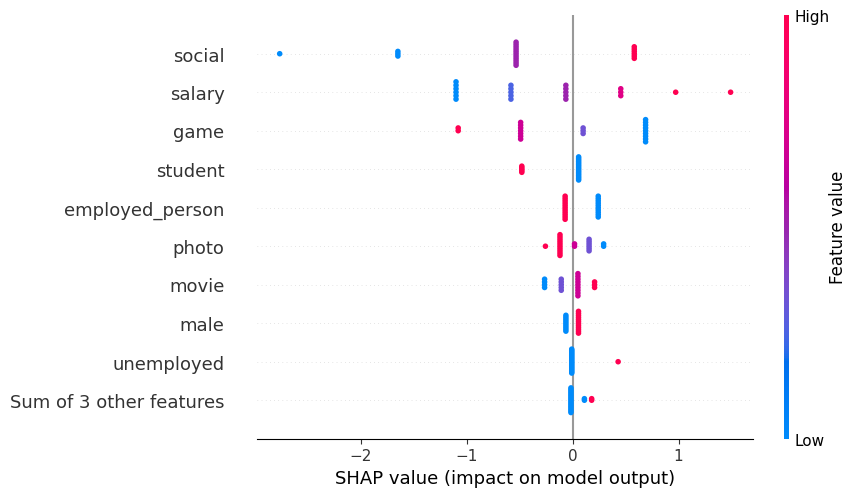

In [ ]:
shap.plots.beeswarm(shap_values)

Sample:
salary: 0
game: 2
social: 2
movie: 1
photo: 1
Freelancer: 0
government officer: 0
student: 1
state_enterprises: 0
unemployed: 0
employed_person: 0
male: 1


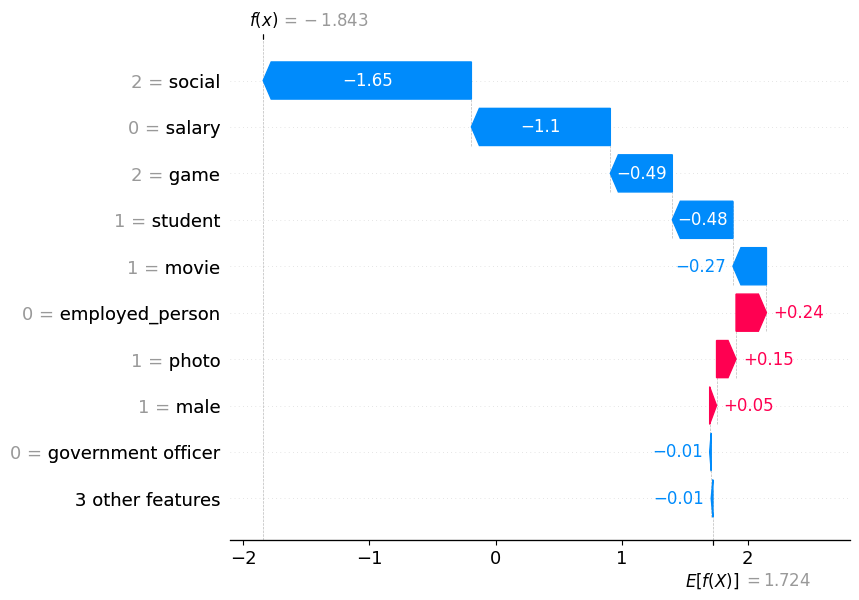


Prediction: [0]


In [ ]:
X_test_ori = X_test.copy()
random.seed(22004)
random_index = random.randint(0, len(X_test_ori) - 1)
sample = X_test_ori.iloc[random_index:random_index+1].copy()

print("Sample:")
for col in sample.columns:
    if sample.iloc[0][col] == 1:
        print(f"{col}: {sample.iloc[0][col]}")
    else:
        print(f"{col}: {sample.iloc[0][col]}")

sample.drop(columns='os', inplace=True, errors='ignore')
shap_values_sample = explainer.shap_values(sample)
shap.waterfall_plot(shap.Explanation(
    values=shap_values_sample[0],
    base_values=explainer.expected_value,
    data=sample.iloc[0]))
print()
print("Prediction:", model.predict(sample))
